In [1]:
import os
import xarray as xr
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns


In [2]:
cwd= os.getcwd()
print(cwd)

C:\Users\Azharul Islam\Desktop\term


In [3]:
file_name='dew.nc'
era_path= os.path.join(cwd, file_name)
print(era_path)

C:\Users\Azharul Islam\Desktop\term\dew.nc


In [4]:
ds=xr.open_dataset(os.path.join(era_path))

In [5]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 21, latitude: 29, time: 87648)
Coordinates:
  * longitude  (longitude) float32 88.0 88.25 88.5 88.75 ... 92.5 92.75 93.0
  * latitude   (latitude) float32 27.0 26.75 26.5 26.25 ... 20.5 20.25 20.0
  * time       (time) datetime64[ns] 2010-01-01 ... 2019-12-31T23:00:00
Data variables:
    d2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-09-23 23:34:50 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [6]:
ds.d2m.attrs

{'units': 'K', 'long_name': '2 metre dewpoint temperature'}

In [7]:
ds.d2m.attrs['units']='C'

In [8]:
ds.d2m.attrs

{'units': 'C', 'long_name': '2 metre dewpoint temperature'}

In [9]:
ds.d2m.values=ds.d2m.values.round(2)

In [10]:
ds.d2m.values = ds.d2m.values - 273

In [11]:
ds.d2m.values=ds.d2m.values.round(2)

In [12]:
ds.d2m.values

array([[[ 4.66,  6.95, 11.05, ...,  4.97,  7.58,  8.21],
        [ 8.79, 10.96, 12.4 , ..., 10.5 ,  9.94, 10.12],
        [10.75, 11.08, 11.22, ..., 12.72, 11.68, 11.51],
        ...,
        [15.17, 15.06, 14.91, ..., 15.05, 12.95, 13.1 ],
        [15.53, 15.41, 15.27, ..., 16.08, 14.38, 13.89],
        [15.85, 15.74, 15.62, ..., 16.36, 16.18, 15.29]],

       [[ 4.62,  7.03, 11.31, ...,  5.01,  7.65,  8.19],
        [ 8.86, 11.15, 12.67, ..., 10.8 , 10.05, 10.04],
        [10.97, 11.33, 11.55, ..., 13.24, 11.93, 11.34],
        ...,
        [15.19, 15.02, 14.91, ..., 15.08, 13.31, 13.33],
        [15.42, 15.26, 15.16, ..., 15.94, 14.52, 14.17],
        [15.79, 15.66, 15.55, ..., 16.21, 15.99, 15.31]],

       [[ 6.01,  8.22, 11.64, ...,  8.1 , 10.24, 10.06],
        [ 9.49, 11.69, 12.87, ..., 12.41, 12.44, 12.02],
        [11.6 , 11.77, 11.95, ..., 14.56, 14.42, 14.03],
        ...,
        [15.48, 15.27, 15.17, ..., 14.6 , 12.55, 12.26],
        [15.47, 15.27, 15.22, ..., 15.85, 14.

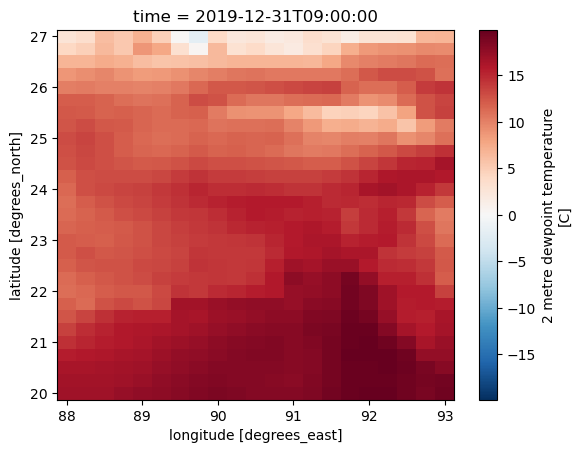

In [13]:
ds['d2m'][-15,: ,: ].plot()

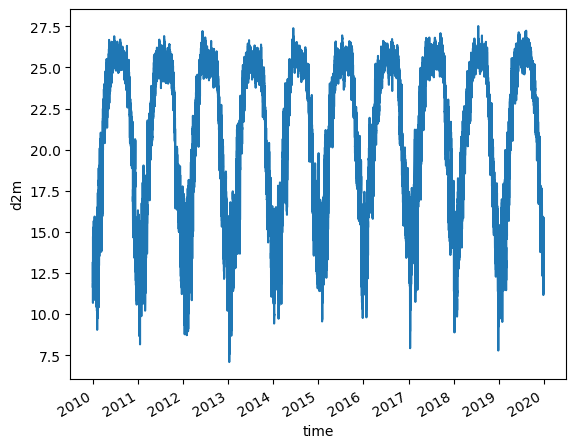

In [14]:
ds['d2m'].mean(dim=['latitude','longitude']).plot()

<Figure size 1200x600 with 0 Axes>

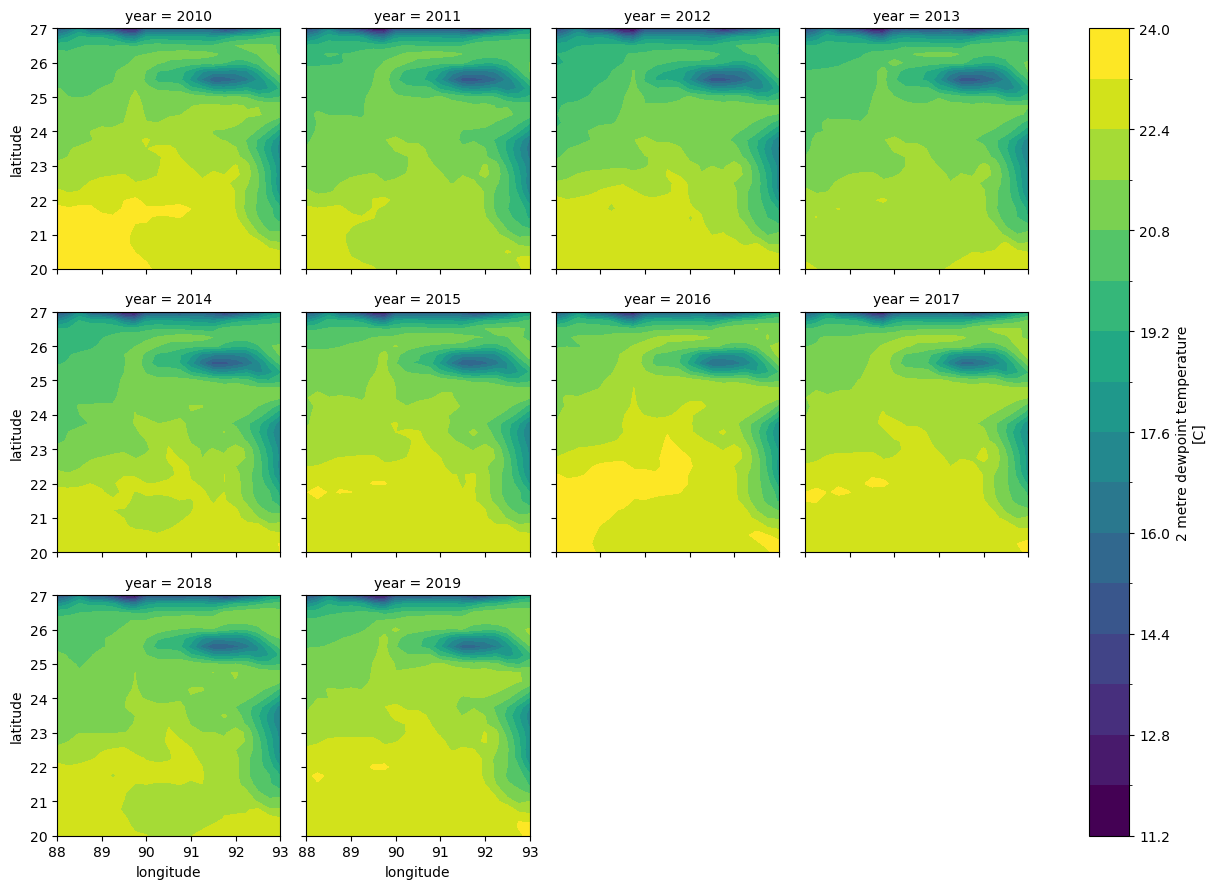

In [15]:
temperature_data = ds['d2m']
# Calculate the mean along the 'time' dimension to get year-wise means
yearly_mean = temperature_data.groupby('time.year').mean(dim='time')

# Assuming 'time' is in datetime format, you can also use 'time.year' to group by years

# Create a contour plot of the year-wise mean temperature data
plt.figure(figsize=(12, 6))
yearly_mean.plot.contourf(x='longitude', y='latitude', col='year', col_wrap=4, levels=20)
#plt.suptitle('Year-wise Mean Temperature (2013-2023)')
plt.show()

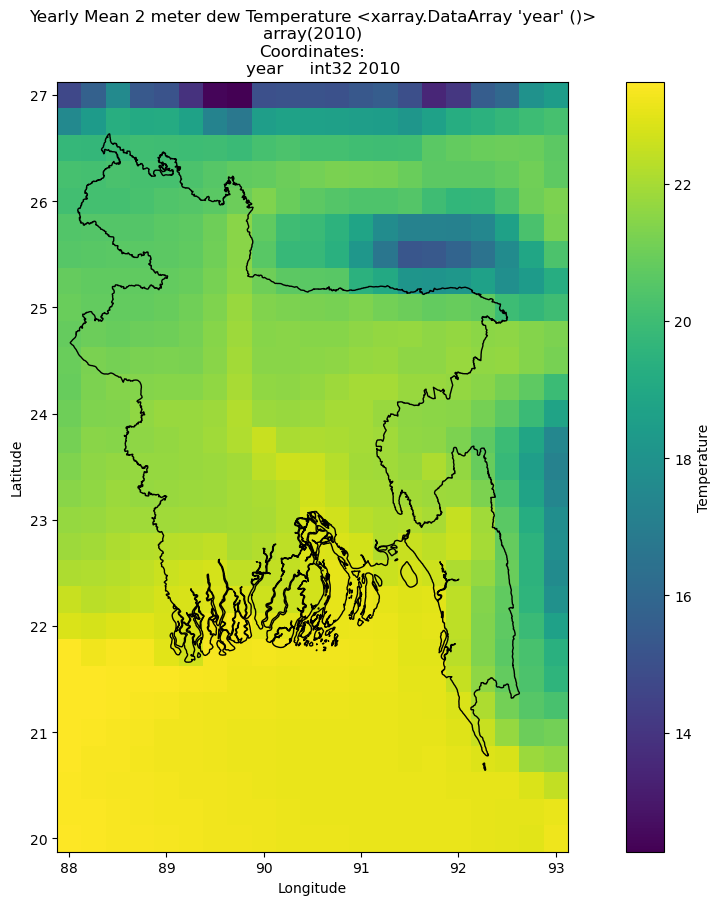

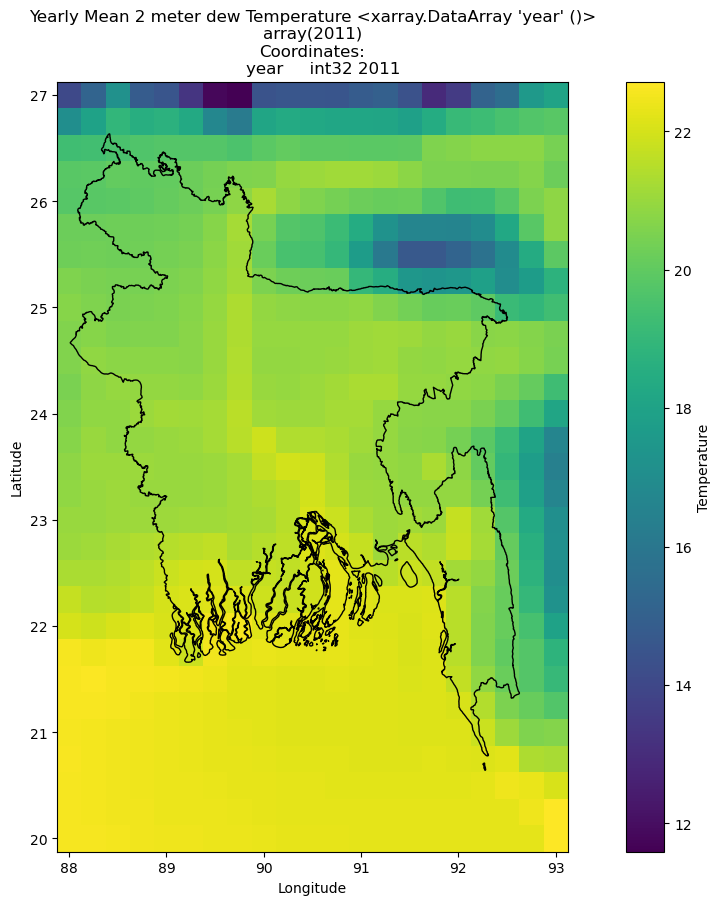

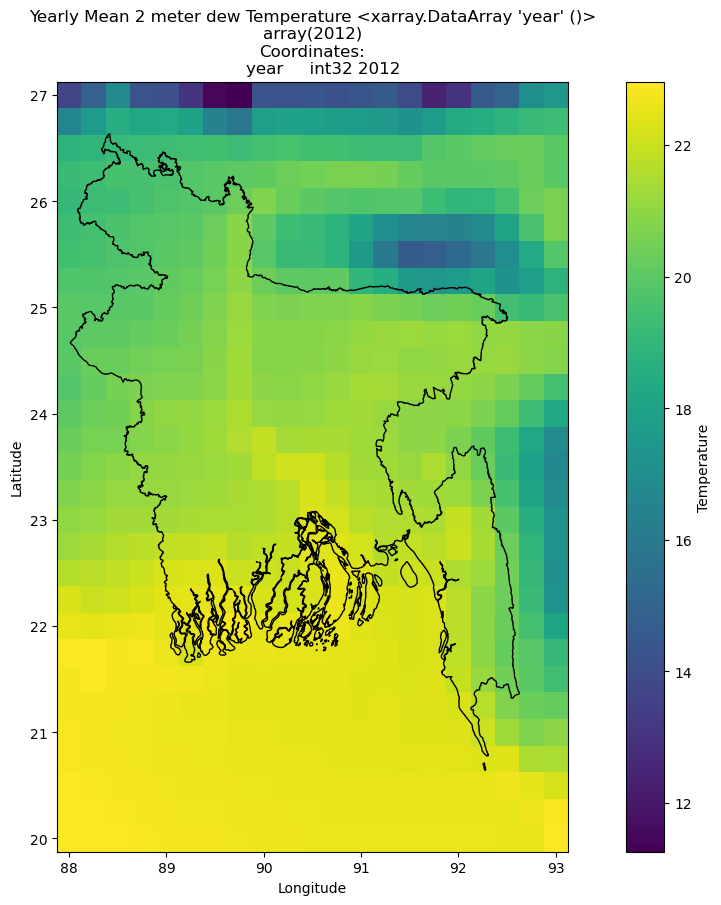

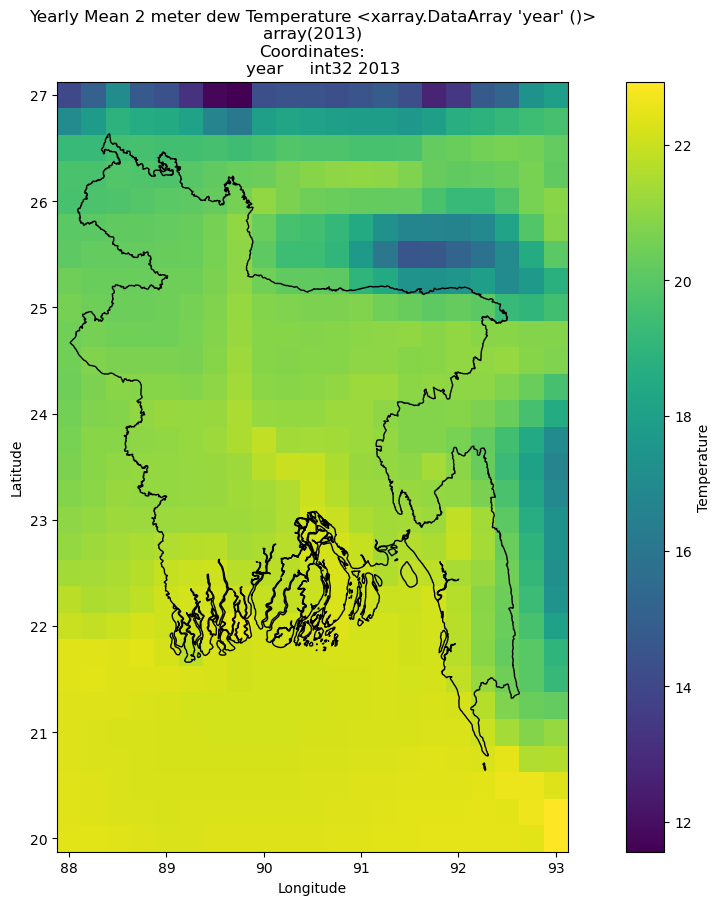

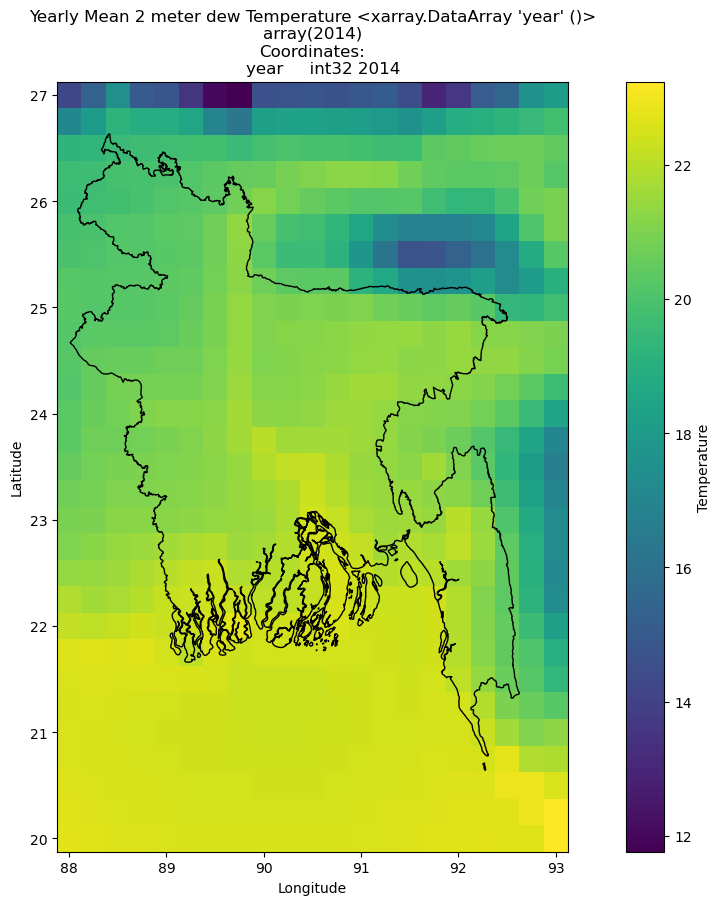

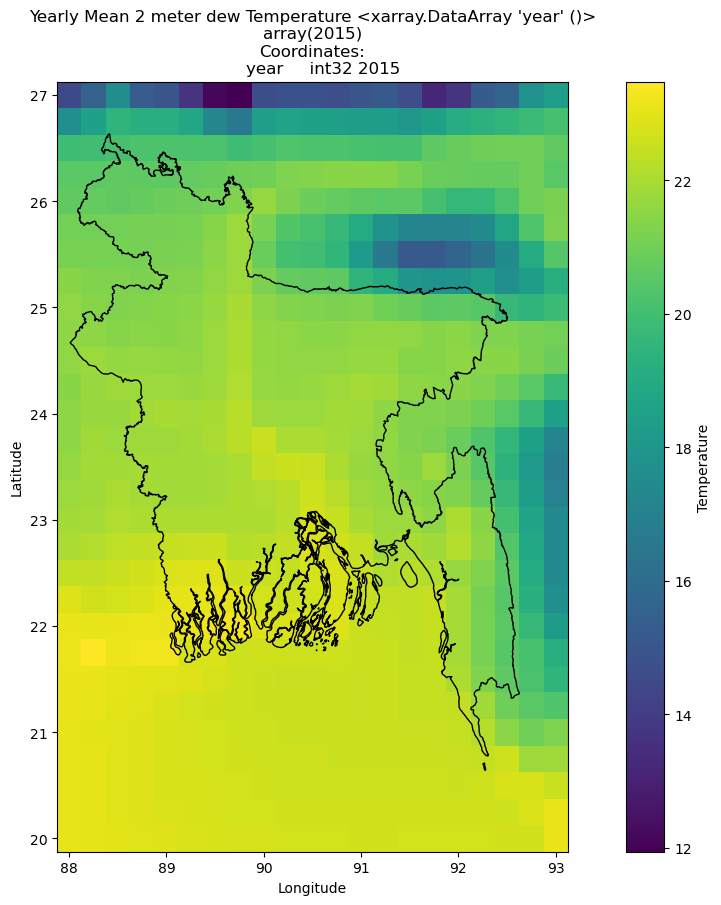

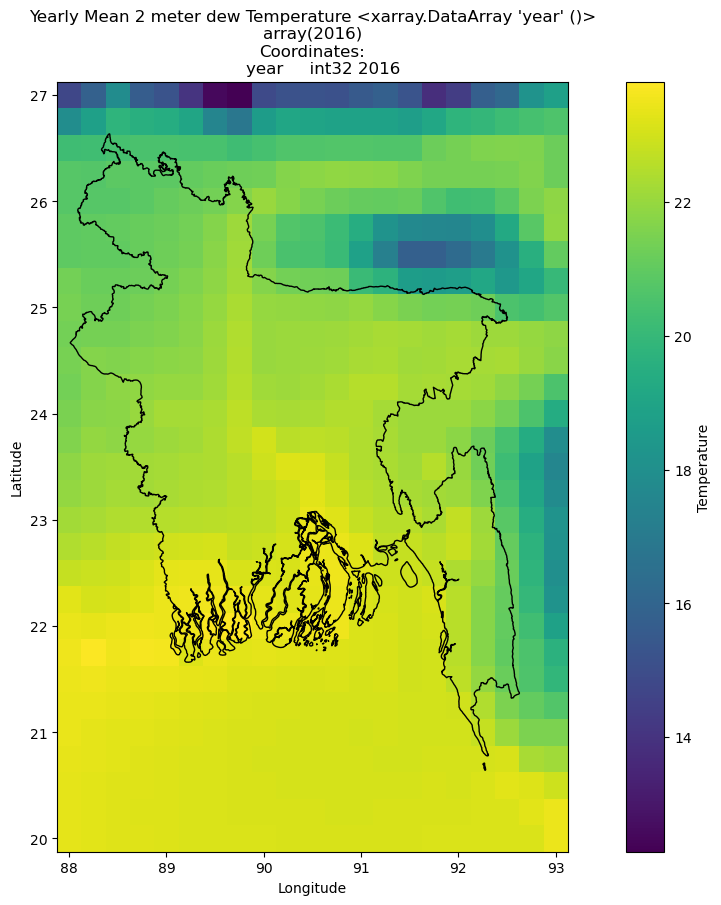

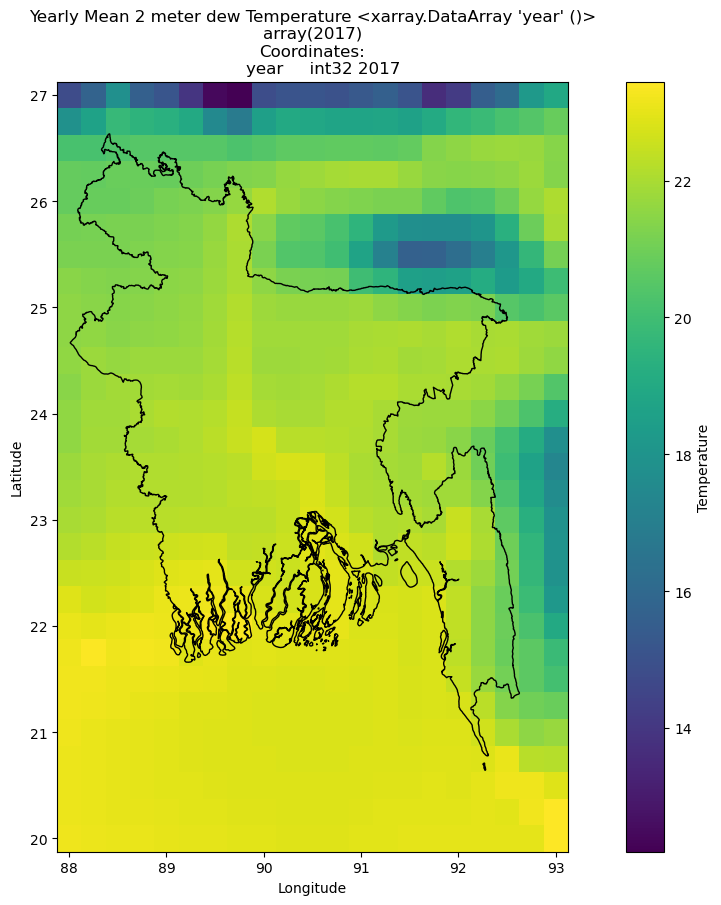

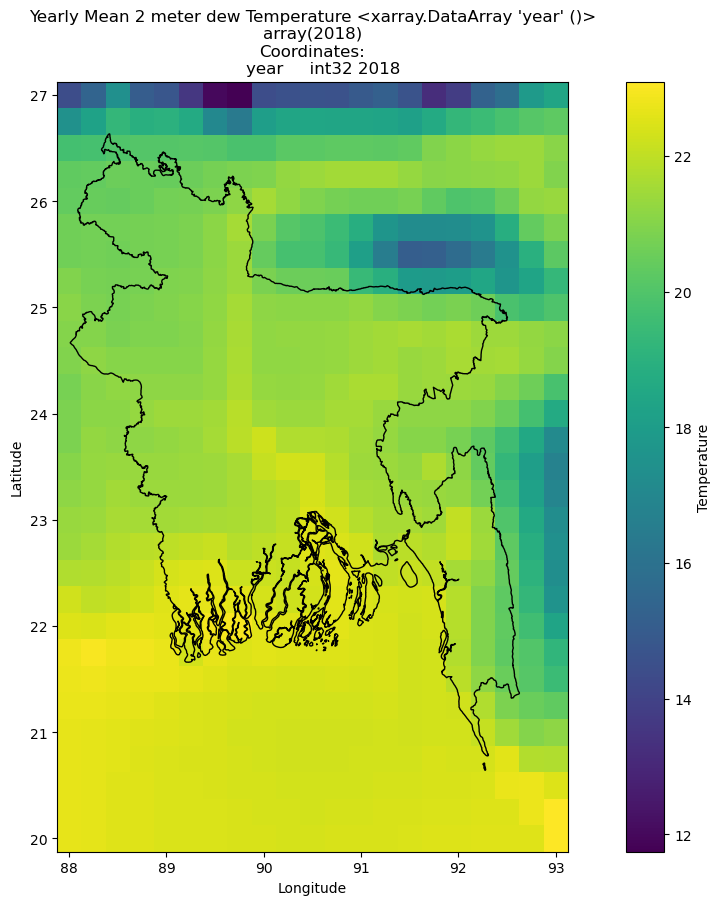

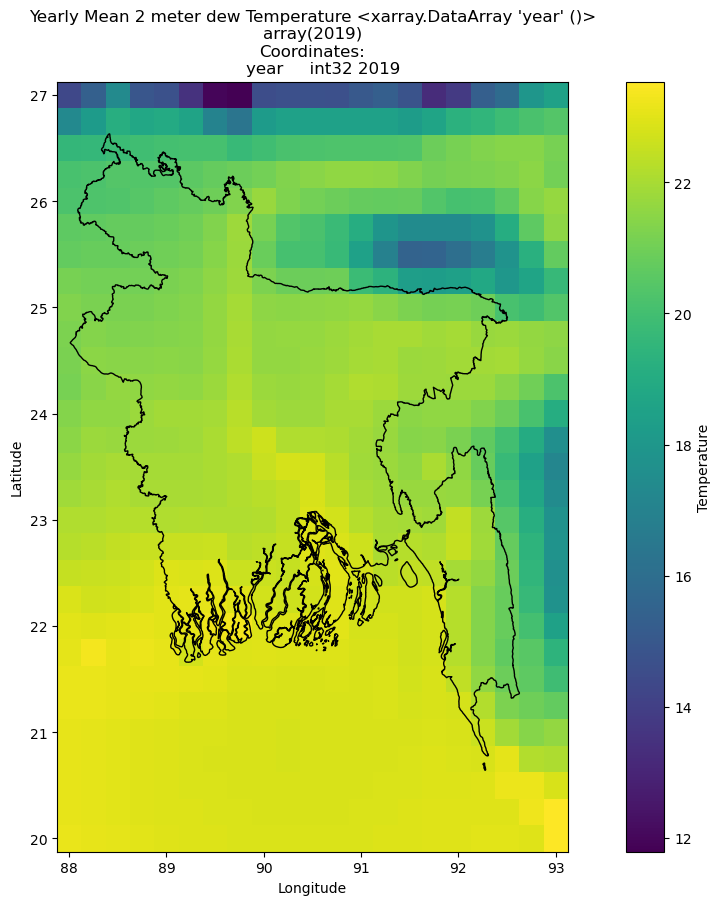

In [16]:


# Calculate yearly means
yearly_means = ds['d2m'].groupby('time.year').mean(dim='time')

# Load the shapefile
gdf = gpd.read_file('C:/Users/Azharul Islam/Desktop/3105/bangladesh/bangladesh.shp')


# Iterate through each year
for year in yearly_means['year']:
    # Select the data for the current year
    year_data = yearly_means.sel(year=year)
    
    # Create a plot
    fig, ax = plt.subplots(figsize=(15, 10))
    

    # Plot the temperature data (adjust cmap and other settings as needed)
    
    year_data.plot(ax=ax, cbar_kwargs={'label': 'Temperature'})
    
    # Overlay the shapefile
    gdf.plot(ax=ax, color='none', edgecolor='black')
    
    # Set plot title and labels
    ax.set_title(f'Yearly Mean 2 meter dew Temperature {year}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    

    
    # Display the plot
    plt.show()


In [17]:
data_2010 = ds.sel(time=slice('2010-01-01', '2010-12-31'))
data_2011 = ds.sel(time=slice('2011-01-01', '2011-12-31'))
data_2012 = ds.sel(time=slice('2012-01-01', '2012-12-31'))
data_2013 = ds.sel(time=slice('2013-01-01', '2013-12-31'))
data_2014 = ds.sel(time=slice('2014-01-01', '2014-12-31'))
data_2015 = ds.sel(time=slice('2015-01-01', '2015-12-31'))
data_2016 = ds.sel(time=slice('2016-01-01', '2016-12-31'))
data_2017 = ds.sel(time=slice('2017-01-01', '2017-12-31'))
data_2018 = ds.sel(time=slice('2018-01-01', '2018-12-31'))
data_2019 = ds.sel(time=slice('2019-01-01', '2019-12-31'))


In [18]:
annual_average_2010 = data_2010.mean(dim='time')
annual_average_2011 = data_2011.mean(dim='time')
annual_average_2012 = data_2012.mean(dim='time')
annual_average_2013 = data_2013.mean(dim='time')
annual_average_2014 = data_2014.mean(dim='time')
annual_average_2015 = data_2015.mean(dim='time')
annual_average_2016 = data_2016.mean(dim='time')
annual_average_2017 = data_2017.mean(dim='time')
annual_average_2018 = data_2018.mean(dim='time')
annual_average_2019 = data_2019.mean(dim='time')

In [19]:
A_2010=annual_average_2010.mean(dim=['latitude','longitude'])
A_2011=annual_average_2011.mean(dim=['latitude','longitude'])
A_2012=annual_average_2012.mean(dim=['latitude','longitude'])
A_2013=annual_average_2013.mean(dim=['latitude','longitude'])
A_2014=annual_average_2014.mean(dim=['latitude','longitude'])
A_2015=annual_average_2015.mean(dim=['latitude','longitude'])
A_2016=annual_average_2016.mean(dim=['latitude','longitude'])
A_2017=annual_average_2017.mean(dim=['latitude','longitude'])
A_2018=annual_average_2018.mean(dim=['latitude','longitude'])
A_2019=annual_average_2019.mean(dim=['latitude','longitude'])

In [20]:
yearly_mean = temperature_data.groupby('time.year').mean(dim='time')


In [21]:
A=yearly_mean.mean(dim=['latitude','longitude'])

In [22]:
A

<xarray.DataArray 'd2m' (year: 10)>
array([21.325089, 20.674253, 20.698391, 20.669306, 20.829754, 21.204578,
       21.696476, 21.530567, 21.00224 , 21.359743], dtype=float32)
Coordinates:
  * year     (year) int32 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019

In [23]:
A_2010,A_2011,A_2012,A_2013,A_2014,A_2015,A_2016,A_2017,A_2018,A_2019

(<xarray.Dataset>
 Dimensions:  ()
 Data variables:
     d2m      float32 21.33,
 <xarray.Dataset>
 Dimensions:  ()
 Data variables:
     d2m      float32 20.67,
 <xarray.Dataset>
 Dimensions:  ()
 Data variables:
     d2m      float32 20.7,
 <xarray.Dataset>
 Dimensions:  ()
 Data variables:
     d2m      float32 20.67,
 <xarray.Dataset>
 Dimensions:  ()
 Data variables:
     d2m      float32 20.83,
 <xarray.Dataset>
 Dimensions:  ()
 Data variables:
     d2m      float32 21.2,
 <xarray.Dataset>
 Dimensions:  ()
 Data variables:
     d2m      float32 21.7,
 <xarray.Dataset>
 Dimensions:  ()
 Data variables:
     d2m      float32 21.53,
 <xarray.Dataset>
 Dimensions:  ()
 Data variables:
     d2m      float32 21.0,
 <xarray.Dataset>
 Dimensions:  ()
 Data variables:
     d2m      float32 21.36)

In [24]:
data = {
    'Year': ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
    'Value': [21.33, 20.67, 20.7, 20.67, 20.83, 21.2, 21.7, 21.53, 21.0, 21.36]
}

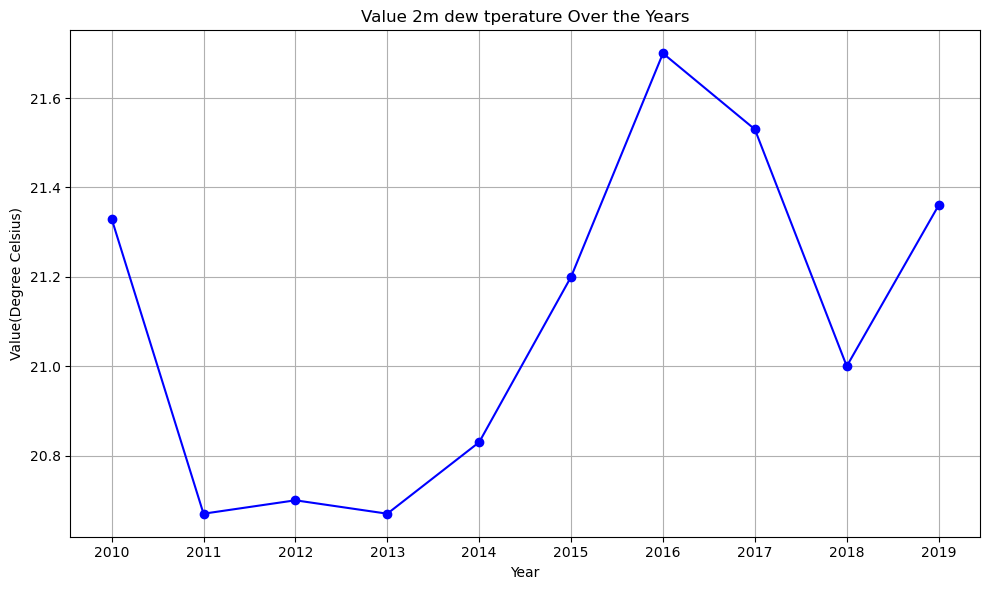

In [25]:
df = pd.DataFrame(data)


# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Value'], marker='o', linestyle='-', color='b')
plt.title('Value 2m dew tperature Over the Years')
plt.xlabel('Year')
plt.ylabel('Value(Degree Celsius)')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

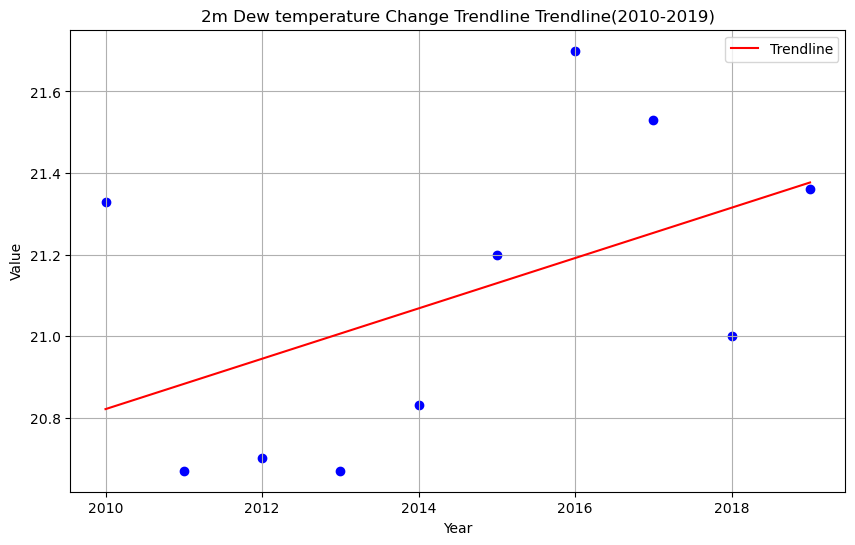

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Data
data = {
    'Year': ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
    'Value': [21.33, 20.67, 20.7, 20.67, 20.83, 21.2, 21.7, 21.53, 21.0, 21.36]
}

# Extract years and values
years = data['Year']
values = data['Value']

# Convert years to integers
years = [int(year) for year in years]

# Create a NumPy array for years and values
years_np = np.array(years)
values_np = np.array(values)

# Fit a linear trendline using numpy.polyfit
coefficients = np.polyfit(years_np, values_np, 1)
polynomial = np.poly1d(coefficients)

# Create a plot
plt.figure(figsize=(10, 6))
plt.scatter(years, values, marker='o', linestyle='-', color='b')
plt.plot(years, polynomial(years_np), label='Trendline', color='red')

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('2m Dew temperature Change Trendline Trendline(2010-2019)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [27]:
monthly2010_avg = data_2010.groupby('time.month').mean(dim='time')
monthly2011_avg = data_2011.groupby('time.month').mean(dim='time')
monthly2012_avg = data_2012.groupby('time.month').mean(dim='time')
monthly2013_avg = data_2013.groupby('time.month').mean(dim='time')
monthly2014_avg = data_2014.groupby('time.month').mean(dim='time')
monthly2015_avg = data_2015.groupby('time.month').mean(dim='time')
monthly2016_avg = data_2016.groupby('time.month').mean(dim='time')
monthly2017_avg = data_2017.groupby('time.month').mean(dim='time')
monthly2018_avg = data_2018.groupby('time.month').mean(dim='time')
monthly2019_avg = data_2019.groupby('time.month').mean(dim='time')


In [28]:
M_2010=monthly2010_avg.mean(dim=['latitude','longitude'])
M_2011=monthly2011_avg.mean(dim=['latitude','longitude'])
M_2012=monthly2012_avg.mean(dim=['latitude','longitude'])
M_2013=monthly2013_avg.mean(dim=['latitude','longitude'])
M_2014=monthly2014_avg.mean(dim=['latitude','longitude'])
M_2015=monthly2015_avg.mean(dim=['latitude','longitude'])
M_2016=monthly2016_avg.mean(dim=['latitude','longitude'])
M_2017=monthly2017_avg.mean(dim=['latitude','longitude'])
M_2018=monthly2018_avg.mean(dim=['latitude','longitude'])
M_2019=monthly2019_avg.mean(dim=['latitude','longitude'])

In [29]:

# Assuming that `A_2013` is an xarray DataArray
M_2010_dataframe = M_2010.to_dataframe()
M_2011_dataframe = M_2011.to_dataframe()
M_2012_dataframe = M_2012.to_dataframe()
M_2013_dataframe = M_2013.to_dataframe()
M_2014_dataframe = M_2014.to_dataframe()
M_2015_dataframe = M_2015.to_dataframe()
M_2016_dataframe = M_2016.to_dataframe()
M_2017_dataframe = M_2017.to_dataframe()
M_2018_dataframe = M_2018.to_dataframe()
M_2019_dataframe = M_2019.to_dataframe()


In [30]:
# Create an empty dataframe with months and years as columns
data = {
    'Months': ['NaN','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
}
df = pd.DataFrame(data)
dataframes = [M_2010_dataframe, M_2011_dataframe, M_2012_dataframe, M_2013_dataframe, M_2014_dataframe,
              M_2015_dataframe, M_2016_dataframe, M_2017_dataframe, M_2018_dataframe, M_2019_dataframe]

# Loop through the dataframes and assign their values to the corresponding columns in df
for year, dataframe in zip(range(2010, 2020), dataframes):
    df[str(year)] = dataframe['d2m']  # Replace 'Your_Column_Name' with the actual column name you want to copy



In [31]:
df

,Months,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Jan,13.195414,12.520756,13.475466,12.093908,13.645350,14.486578,13.894105,13.855501,12.966256,13.161200
2,Feb,14.952821,14.670367,14.209071,14.798287,14.710923,15.992531,17.582840,15.978685,16.388931,15.651712
3,Mar,19.531603,18.050268,17.945740,18.419065,17.578823,18.044931,20.019243,18.778978,19.420433,18.453817
4,Apr,23.480837,21.457670,22.061684,21.356743,21.162802,22.071999,23.585340,22.561926,21.912661,22.660791
5,May,24.632959,24.202188,24.281490,24.233881,24.107601,24.554522,24.160004,24.529215,23.769079,24.867243
6,Jun,25.620359,25.415659,25.652832,25.501575,25.779310,25.297611,25.531822,25.524355,25.551474,25.787392
7,Jul,25.539227,25.296448,25.385927,25.362595,25.676260,25.388992,25.500982,25.594414,25.705677,25.709150
8,Aug,25.567619,25.188406,25.363312,25.218391,25.364372,25.530943,25.570940,25.734591,25.670771,25.900425
9,Sep,25.094437,25.066492,25.073942,25.042292,24.916563,25.316923,25.388655,25.620312,25.292782,25.242884


In [32]:
data2 = {
    'Months': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    2010: [13.195414, 14.952821, 19.531603, 23.480837, 24.632959, 25.620359, 25.539227, 25.567619, 25.094437, 23.798771, 19.653021, 14.493106],
    2011: [12.520756, 14.670367, 18.050268, 21.457670, 24.202188, 25.415659, 25.296448, 25.188406, 25.066492, 23.102165, 17.812195, 14.954985],
    2012: [13.475466, 14.209071, 17.945740, 22.061684, 24.281490, 25.652832, 25.385927, 25.363312, 25.073942, 22.458576, 17.827032, 14.479259],
    2013: [12.093908, 14.798287, 18.419065, 21.356743, 24.233881, 25.501575, 25.362595, 25.218391, 25.042292, 23.227079, 17.696882, 14.736064],
    2014: [13.645350, 14.710923, 17.578823, 21.162802, 24.107601, 25.779310, 25.676260, 25.364372, 24.916563, 22.742754, 18.555643, 15.353407],
    2015: [14.486578, 15.992531, 18.044931, 22.071999, 24.554522, 25.297611, 25.388992, 25.530943, 25.316923, 23.090221, 19.144526, 15.256989],
    2016: [13.894105, 17.582840, 20.019243, 23.585340, 24.160004, 25.531822, 25.500982, 25.570940, 25.388655, 23.765659, 18.967558, 16.340902],
    2017: [13.855501, 15.978685, 18.778978, 22.561926, 24.529215, 25.524355, 25.594414, 25.734591, 25.620312, 23.845402, 19.295839, 16.732231],
    2018: [12.966256, 16.388931, 19.420433, 21.912661, 23.769079, 25.551474, 25.705677, 25.670771, 25.292782, 22.290966, 18.335993, 14.503923],
    2019: [13.161200, 15.651712, 18.453817, 22.660791, 24.867243, 25.787392, 25.709150, 25.900425, 25.242884, 23.518791, 20.236774, 14.848179]
}

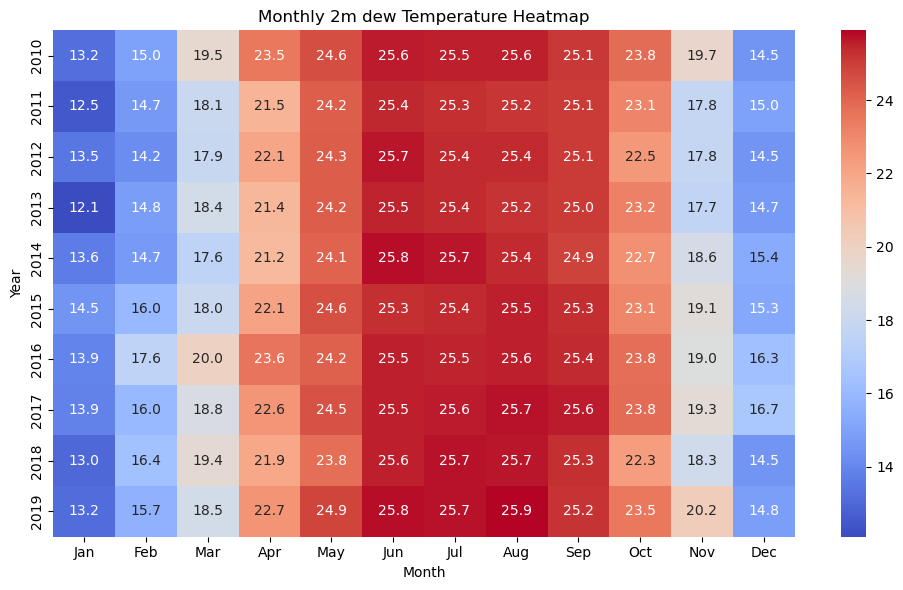

In [33]:
import seaborn as sns

df = pd.DataFrame(data2)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.set_index('Months').T, cmap='coolwarm', annot=True, fmt='.1f')
plt.xlabel('Month')
plt.ylabel('Year')
plt.title('Monthly 2m dew Temperature Heatmap')
plt.tight_layout()
plt.show()

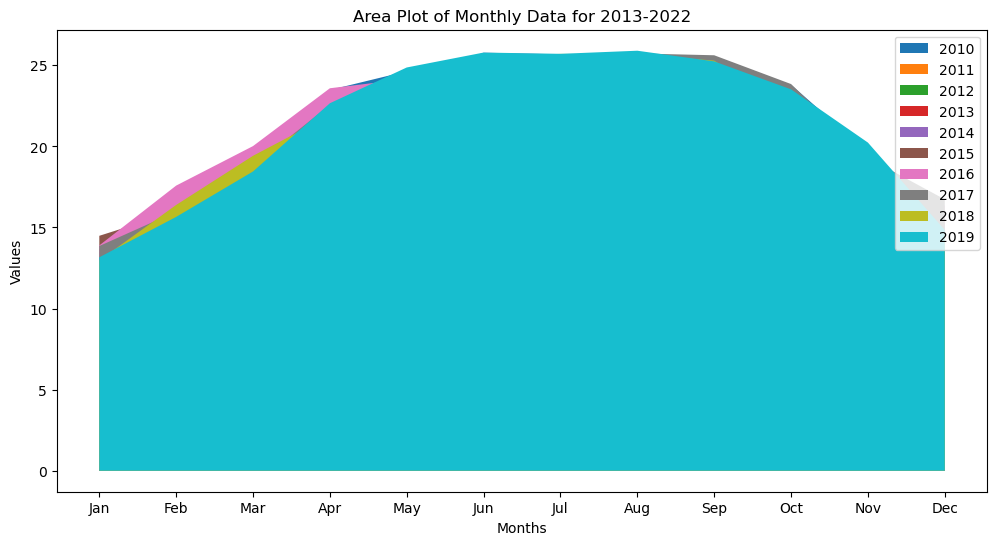

In [43]:
plt.figure(figsize=(12, 6))
for year in range(2010, 2020):
    plt.fill_between(data2['Months'], data2[year], label=str(year))

plt.xlabel('Months')
plt.ylabel('Values')
plt.title('Area Plot of Monthly Data for 2013-2022')
plt.legend()
plt.show()

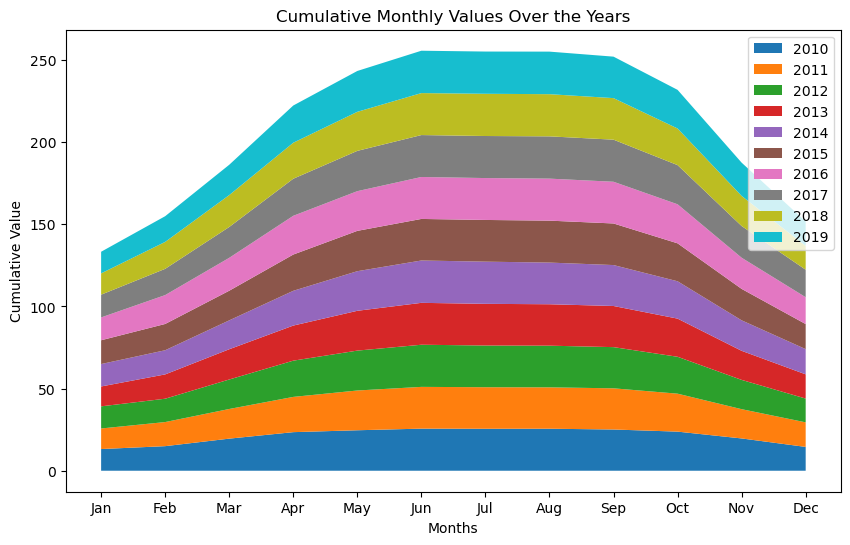

In [35]:

years = range(2010, 2020)
monthly_values = [data2[int(year)] for year in years]

plt.figure(figsize=(10, 6))

# Create a stacked area chart
for i, year in enumerate(years):
    if i == 0:
        plt.fill_between(data2['Months'], 0, monthly_values[i], label=str(year))
    else:
        plt.fill_between(data2['Months'], np.sum(monthly_values[:i], axis=0), np.sum(monthly_values[:i+1], axis=0), label=str(year))

plt.xlabel('Months')
plt.ylabel('Cumulative Value')
plt.title('Cumulative Monthly Values Over the Years')
plt.legend()
plt.show()


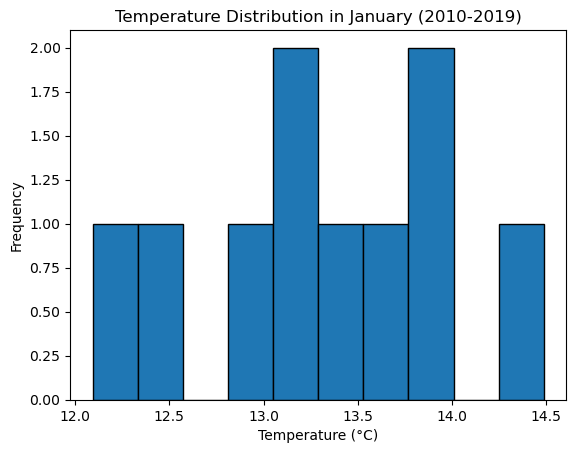

In [36]:
month_index = data2['Months'].index('Jan')
january_temperatures = [data2[year][month_index] for year in years]

plt.hist(january_temperatures, bins=10, edgecolor='k')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Temperature Distribution in January (2010-2019)')
plt.show()


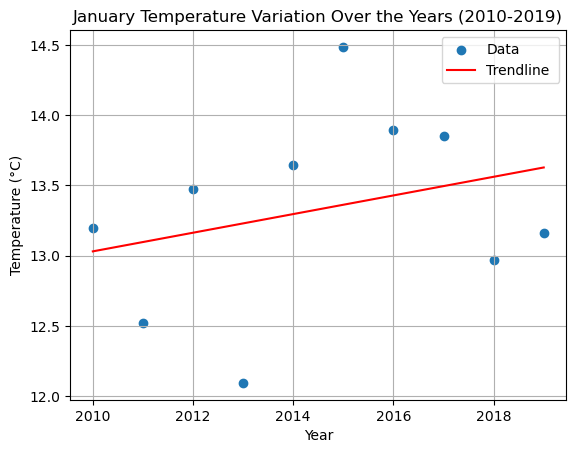

In [37]:


# Get the index of 'Jan' in the 'Months' list
month_index = data2['Months'].index('Jan')
january_temperatures = [data2[year][month_index] for year in years]

# Scatter plot of January temperatures
plt.scatter(years, january_temperatures, label='Data')

# Calculate the linear regression line
slope, intercept, r_value, p_value, std_err = linregress(years, january_temperatures)
trendline = intercept + slope * np.array(years)

# Plot the trend line
plt.plot(years, trendline, color='red', label='Trendline ')

plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('January Temperature Variation Over the Years (2010-2019)')
plt.legend()
plt.grid(True)
plt.show()


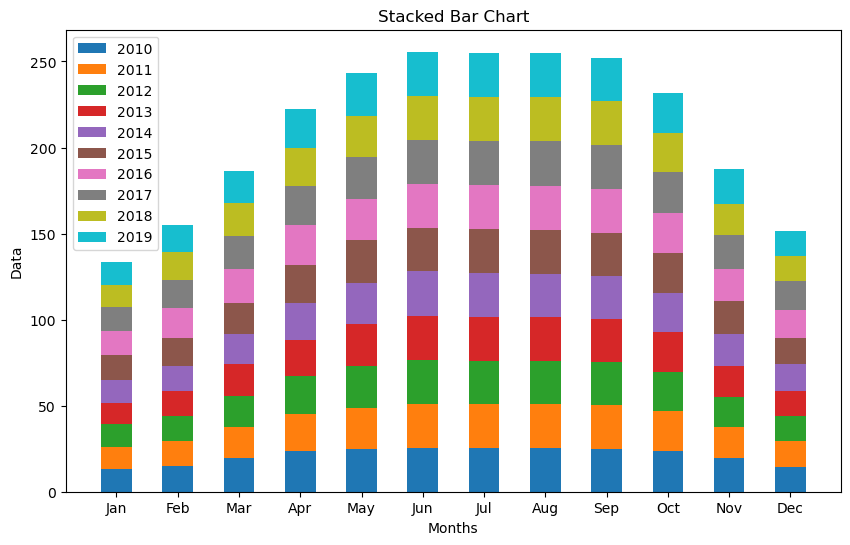

In [38]:


width = 0.5
x = np.arange(len(data2['Months']))
bottom = np.zeros(len(data2['Months']))
plt.figure(figsize=(10, 6))

for year in range(2010, 2020):
    plt.bar(x, data2[year], width, bottom=bottom, label=str(year))
    bottom += data2[year]

plt.xticks(x, data2['Months'])
plt.legend()
plt.xlabel('Months')
plt.ylabel('Data')
plt.title('Stacked Bar Chart')
plt.show()

In [39]:
yearly_mean = temperature_data.groupby('time.month').mean(dim='time')
B=yearly_mean.mean(dim=['latitude','longitude'])
B

<xarray.DataArray 'd2m' (month: 12)>
array([13.329453, 15.496472, 18.62429 , 22.231243, 24.333818, 25.56624 ,
       25.515966, 25.510977, 25.205526, 23.184038, 18.752546, 15.169906],
      dtype=float32)
Coordinates:
  * month    (month) int32 1 2 3 4 5 6 7 8 9 10 11 12

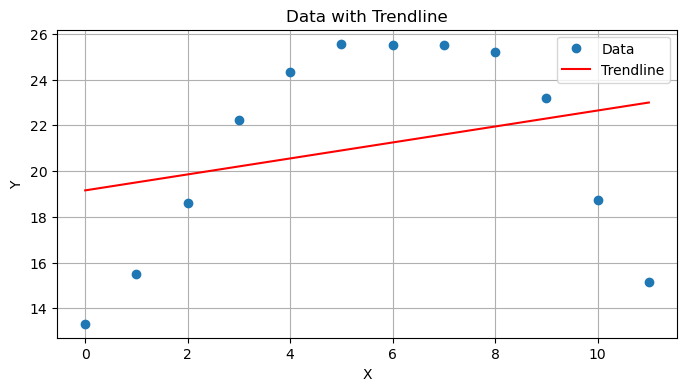

In [41]:
x = np.arange(len(data3))

# Fit a linear regression model to your data
coefficients = np.polyfit(x, data3, 1)
trendline = np.poly1d(coefficients)

# Create a plot
plt.figure(figsize=(8, 4))
plt.plot(x, data3, 'o', label='Data')
plt.plot(x, trendline(x), '-', label='Trendline', color='red')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Show the plot
plt.grid(True)
plt.title('Data with Trendline')
plt.show()